In [208]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


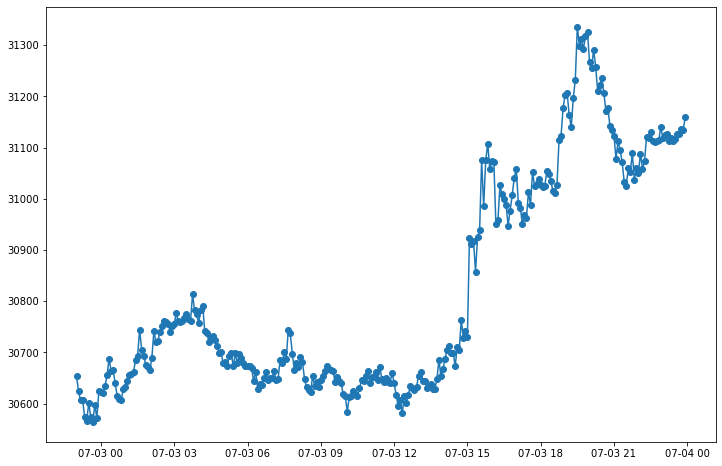

In [209]:
data = data[['open']]
# data = (data-data.min())/(data.max()-data.min())
plt.figure(figsize=(12, 8))
plt.plot(data[-300:], marker='o', label='open')
plt.show()

In [210]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import gamma
from collections import defaultdict
from random import choice, random, randint

In [211]:
def kth_element(arr, l: int, r: int, k: int):
    if r - l == 1:
        return arr[l]
    print(l, r)
    pivot = choice(arr[l: r])
    lq = l
    rq = r - 1
    while lq <= rq:
        if arr[lq] <= pivot:
            lq += 1
        else:
            arr[lq], arr[rq] = arr[rq], arr[lq]
            rq -= 1
    
    if k < lq - l:
        return kth_element(arr, l, lq, k)
    return kth_element(arr, lq, r, k - (lq - l))

def get_kth_element(arr, k):
    # k = min(k, len(arr))
    # print(k)
    # return kth_element(arr, 0, len(arr), k)
    return sorted(arr)[k]

# a = [1] * 100
# a = [2, 2, 3 , 3, 1, 1, 4]
# print(get_kth_element(a, 4))

<b>Functions for clusters and vectors</b>

In [212]:
def volume(r, m):
    return np.pi ** (m / 2) * r ** m / gamma(m / 2 + 1)



In [213]:
class Wishart:
    labels: list
    
    def __init__(self, r, u):
        self.radius = r
        self.u = u
        
    def significant(self, cluster, p):
        dif = [abs(p[i] - p[j]) for i, j in zip(cluster, cluster)]
        return max(dif) >= self.u
    
        
    def fit(self, x):
        n = len(x)
        m = len(x[0])
        dist = squareform(pdist(x))
        dr = []
        # print(dist)
        for i in range(n):
            dr.append(get_kth_element(dist[i], self.radius - 1))
        
        p = [self.radius / (volume(i, m) * n) for i in dr]
        last = 1
        labels = np.full(n, 0)
        completed = {0: False}
        vertices = []
        for d, i in sorted(zip(dr, range(n))):
            neighbours = []
            neighbours_w = []
            clusters = defaultdict(list)
            for j in vertices:
                if dist[i][j] <= d:
                    neighbours.append(j)
                    neighbours_w.append(labels[j])
                    clusters[labels[j]].append(j)
            vertices.append(i)
            if len(neighbours) == 0:
                labels[i] = last
                completed[last] = False
                last += 1
            elif len(neighbours_w) == 1:
                wj = neighbours_w[0]
                if completed[wj]:
                    labels[i] = 0
                else:
                    labels[i] = wj
            else:
                if all([completed[l] for l in neighbours_w]):
                    labels[i] = 0
                    continue
                significant_clusters = set(wj for wj in neighbours_w if self.significant(clusters[wj], p))
                if len(significant_clusters) > 1:
                    labels[i] = 0
                    for wj in neighbours_w:
                        if wj in significant_clusters:
                            completed[wj] = (wj != 0)
                            continue
                        for v in clusters[wj]:
                            labels[v] = 0
                else:
                    if len(significant_clusters) == 1:
                        c1 = next(iter(significant_clusters))
                    else:
                        c1 = min(neighbours_w)
                    labels[i] = c1
                    for wj in neighbours_w:
                        for v in clusters[wj]:
                            labels[v] = c1
        self.labels = labels
        return labels
    

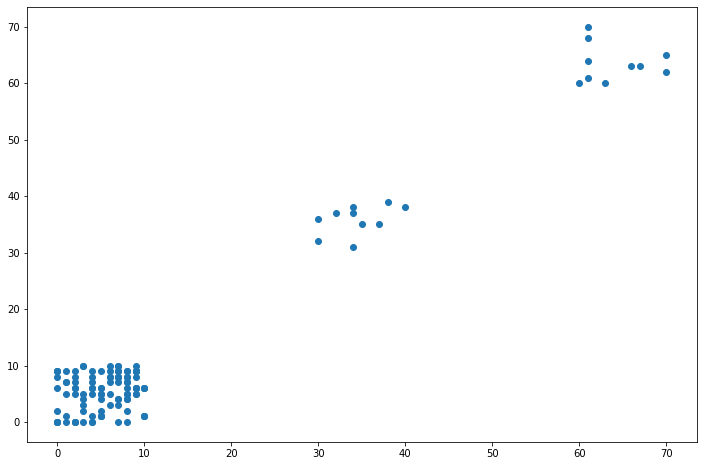

In [214]:
x = [randint(0, 10) for i in range(100)] + [randint(30, 40) for i in range(10)] + [randint(60, 70) for i in range(10)]
y = [randint(0, 10) for i in range(100)] + [randint(30, 40) for i in range(10)] + [randint(60, 70) for i in range(10)]

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.show()

[ 7  1  1  1  7  1  1  2  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1
  7  1  1  1  1  1  7  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  7  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10]


/tmp/ipykernel_4400/1497176283.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


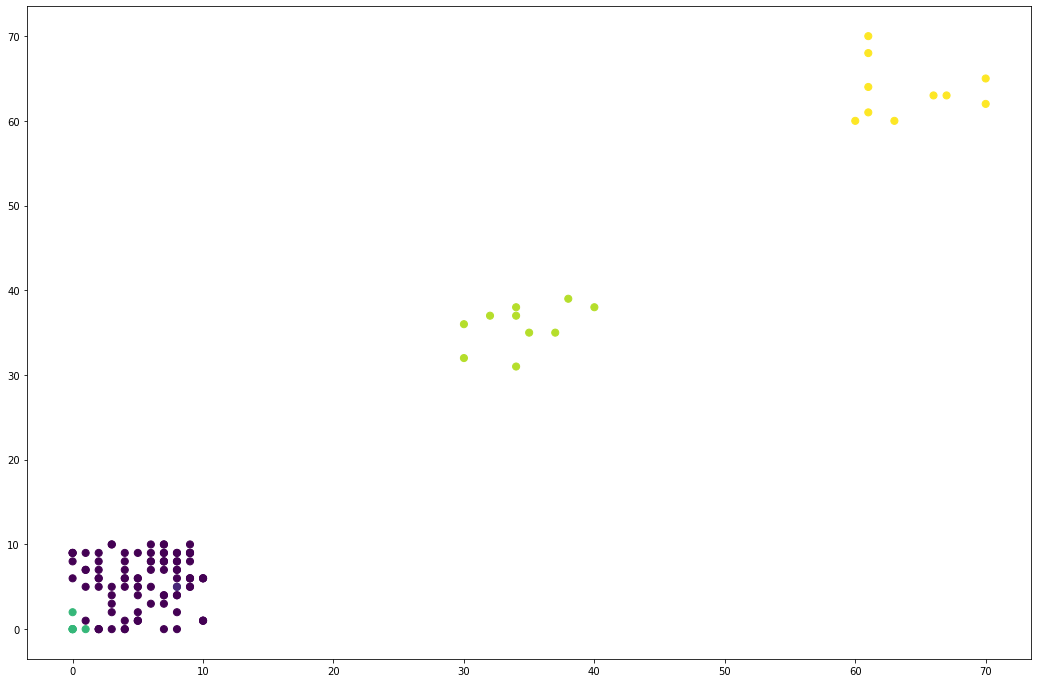

In [215]:
wishart = Wishart(7, 0.2)
# w = wishart.fit([[0, 1], [2, 3], [3, 5], [4, 2]])
labels = wishart.fit(list(zip(x, y)))
# plt.figure(figsize=(12, 8))
print(labels)
# plt.scatter(x, y, w)
# plt.text(x[0],y[0],w[0], ha="center", va="center")
# for i in range(2):
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=labels,s=50)
#     plt.text(x[i],y[i],w[i], ha="center", va="center")
fig.show()

In [216]:
from ipynb.fs.full.indexes import MeasureIndexes
# points = list(zip(x, y))
# points = [list(i) for i in points]
# print(points)
print(labels)
points = np.array([[1, 2], [2, 1], [1, 1], [2, 2], [5, 5], [5, 6], [7, 5]])
cluster = np.array([0, 0, 0, 0, 1, 1, 1])
print(len(x), len(labels))
calculator = MeasureIndexes(points, cluster)

res = calculator.Calculate()
for key in res:
    print(key, res[key])


[ 7  1  1  1  7  1  1  2  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1
  7  1  1  1  1  1  7  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  7  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10]
120 120
RS 0.9115323854660348
G 37.17556877593904
CH 51.51785714285713
D 0.0
S 0.7488352839464326
DB 0.30519670878508837
XB 0.023768259470165882


<b>Generating motifs and patterns</b>

In [217]:
def GenerateMotifsByPattern(pattern, t):
  # Returns motifs according to given pattern
  L = len(pattern)
  idx = []
  idx.append(0)
  for i in range(L):
    idx.append(idx[len(idx) - 1] + pattern[i])
  motifs = []
  while idx[len(idx) - 1] != t + 1:
    motifs.append(idx.copy())
    for i in range(len(idx)):
      idx[i] += 1
  return motifs

def IteratePatterns(patterns, pattern, i, L, sum, Kmax):
  # Generate all patterns with sum <= Kmax and length = L - 1
  if i == L - 1:
    patterns.append(pattern.copy())
  else:
    for j in range(1, Kmax - sum + 1):
      pattern[i] = j
      IteratePatterns(patterns, pattern, i + 1, L, sum + j, Kmax)

def GenPatterns(patterns, pattern, i, L, Kmax):
  if i == L - 1:
    patterns.append(pattern.copy())
  else:
    for j in range(1, Kmax + 1):
      pattern[i] = j
      GenPatterns(patterns, pattern, i + 1, L, Kmax)

def GenerateAllMotifs(Kmax, L, t):
  # Returns map [pattern, [motifs...]]
  patterns = []
  pattern = []
  for i in range(L - 1):
    pattern.append(0)
  # IteratePatterns(patterns, pattern, 0, L, 0, Kmax)
  GenPatterns(patterns, pattern, 0, L, Kmax)
  # print(len(patterns))
  motifsByPatterns = []
  for p in patterns:
    motifs = GenerateMotifsByPattern(p, t)
    motifsByPatterns.append([p, motifs])
  return motifsByPatterns


# print(GenPatterns([], list(range(2)), 0, 2, 10))
# q = GenerateAllMotifs(10, 4, 100)
# print(q[:100])

<b>Get centers for Clusters</b>

In [218]:
from itertools import groupby
WISHART_R = 10
WISHART_U = 0.2
def get_centers(x_train):
    N = len(x_train[0])
    wishart = Wishart(WISHART_R, WISHART_U)
    labels = wishart.fit(x_train)
    sorted_by_cluster = sorted(range(len(labels)), key=lambda x: labels[x])
    centers = []
    for wi, cluster in groupby(sorted_by_cluster, lambda x: labels[x]):
        cluster = list(cluster)
        center = np.full(N, 0.0)
        for i in cluster:
            center += x_train[i]
        centers.append(center / len(cluster))

    return centers
    

In [219]:
from statistics import mean
size = len(data)
train_data = data[:int(size * 0.7)]
test_data = data[int(size * 0.7):]

In [294]:
def get_val_for_pattern_and_pos(data: np.array, pattern: list, pos: int, bad):
    val = []
    sum = 0
    for i in range(len(pattern) - 1, -1, -1):
      sum += pattern[i]
      val.append(data[pos - sum])
      if bad[pos - sum]:
          return np.array([])
    val = val[::-1]
    return np.array(val)

def get_val_for_motifs(data: np.array, motif: list, bad):
    val = []
    for i in motif:
        val.append(data[i])
        if bad[i]:
            return np.array([])
    return np.array(val)


def mode(a):
    return max(set(a), key=a.count)

def is_predictable(a):
    return abs(mean(a) - mode(a)) / mode(a) <= 0.1

def get(a):
    return abs(mean(a) - mode(a)) / mode(a)

def base_prediction(data, h: int, L: int = 3, kmax: int = 10, eps: float = 5):
    t = len(data)
    prediction = data
    prediction = np.resize(prediction, t + h)
    bad = np.array([0 for i in range(t + h)])
    # print(prediction)
    for i in range(t):
        prediction[i] = data[i]
    possible_values = [[] for i in range(h)]
    d = []
    for i in range(h):
        for pattern, all_motifs  in GenerateAllMotifs(kmax, L, t + i - 1):
            val_for_pattern = get_val_for_pattern_and_pos(prediction, pattern, t + i, bad)
            # print(val_for_pattern)
            if len(val_for_pattern) == 0:
                continue
            start = val_for_pattern[0]
            val_for_pattern = val_for_pattern - [val_for_pattern[0]] * len(val_for_pattern)
          
            all_val = [get_val_for_motifs(prediction, motif, bad) for motif in all_motifs]
            all_val = [i - [i[0]] * len(i) for i in all_val if len(i)]
            centers = get_centers(all_val)

            for c in centers:
              if len(c) == 0:
                  continue
            #   print(c, val_for_pattern)
              dist = np.linalg.norm(c[:-1] + val_for_pattern)
            #   d.append(dist)
              if dist < eps:
                  
                  print(val_for_pattern)
                  print(c)
                  print(dist)
                #   print(start)
                  possible_values[i].append(c[-1] + start)
                
        # sorted(possible_values)mean
        # print("aa")
        # print(len(possible_values[i]))
        if len(possible_values[i]):
            # print(len(possible_values[i]),  mean(possible_values[i]))
            # print(get(possible_values[i]))
            prediction[t + i] = mean(possible_values[i])
        else:
            bad[t + i] = 1
        # print(prediction[t + i])
    # print(sorted(d)[len(d) // 2])
    return [prediction, bad]


# base_prediction(test_data[-40:], 5)


3225
[ 0.   24.46]
[ 0.         -1.46809735 -1.16061947]
25.92809734513503
[ 0.   24.46]
[  0.          -4.46747573 -12.51087379]
28.92747572816006
[ 0.   24.46]
[0.         4.55716667 7.624     ]
19.902833333333547
[ 0.   24.46]
[ 0.   -9.91 -1.53]
34.36999999999898
[ 0.   24.46]
[ 0.       3.80625 15.3375 ]
20.65374999999767
[ 0.   15.73]
[ 0.         -2.00772727 -5.26768182]
17.73772727272444
[ 0.   15.73]
[  0.      -3.2349 -11.432 ]
18.96490000000267
[ 0.   15.73]
[ 0.         -3.33866667 -1.834     ]
19.068666666677018
[ 0.   15.73]
[ 0.          5.29803279 14.05540984]
10.431967213120515
[ 0.   15.73]
[  0.   -21.61  -1.62]
37.340000000000146
[ 0.   19.54]
[ 0.         -0.95335968 -3.53039526]
20.49335968379819
[ 0.   19.54]
[  0.          -8.25920635 -17.02555556]
27.79920634921291
[ 0.   19.54]
[0.         4.99428571 2.37857143]
14.545714285715803
[ 0.   19.54]
[ 0.          2.30985915 -1.66338028]
17.2301408450694
[ 0.   19.54]
[ 0.    14.665 21.555]
4.875
[ 0.   -5.51]
[  0.

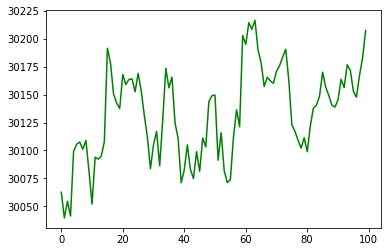

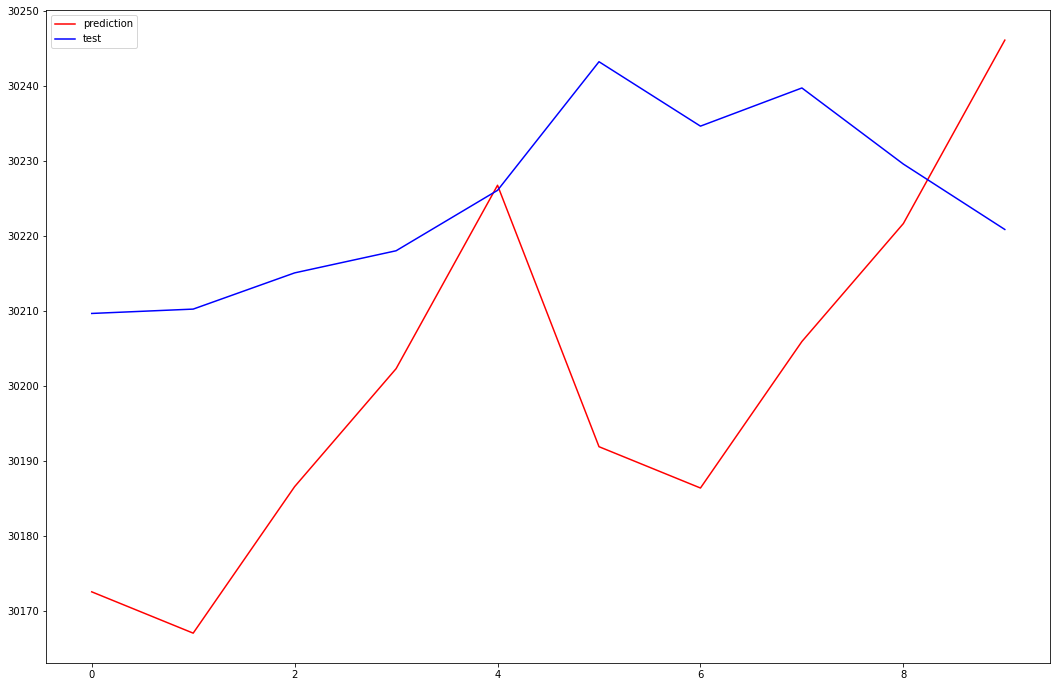

In [295]:
h = 10
print(len(train_data))
prediction, bad = base_prediction(train_data['open'][-400:], h, L=3, eps=100)

# print(prediction[-h:])
plt.plot(list(train_data['open'][-100:]), 'g', label='prediction')
print(prediction[-h:])
print(bad[-h:])
plt.figure(figsize=(18, 12))
plt.plot(prediction[-h:], 'r', label='prediction')
plt.plot(list(test_data['open'][:h]), 'b', label='test')
plt.legend(loc='best')
# plt.scatter(list(range(0, h)), list(prediction[-h:]), s=50, c='r', label='prediction')
# # plt.plot(test_data, 'b', label='prediction')
plt.show()

3225
0.0009607804146533691
0.000693005610600182
0.001244873779494157
0.0016881361828767715
0.002416080979416069
0.0011763983405421465
0.0009137801451081808
0.0014655911205904311
0.0018751065249429076
0.0025452700132708407
[30172.565 30167.055 30186.595 30202.325 30226.785 30191.92  30186.41
 30205.95  30221.68  30246.14 ]
[0 0 0 0 0 0 0 0 0 0]


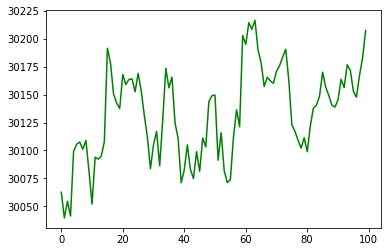

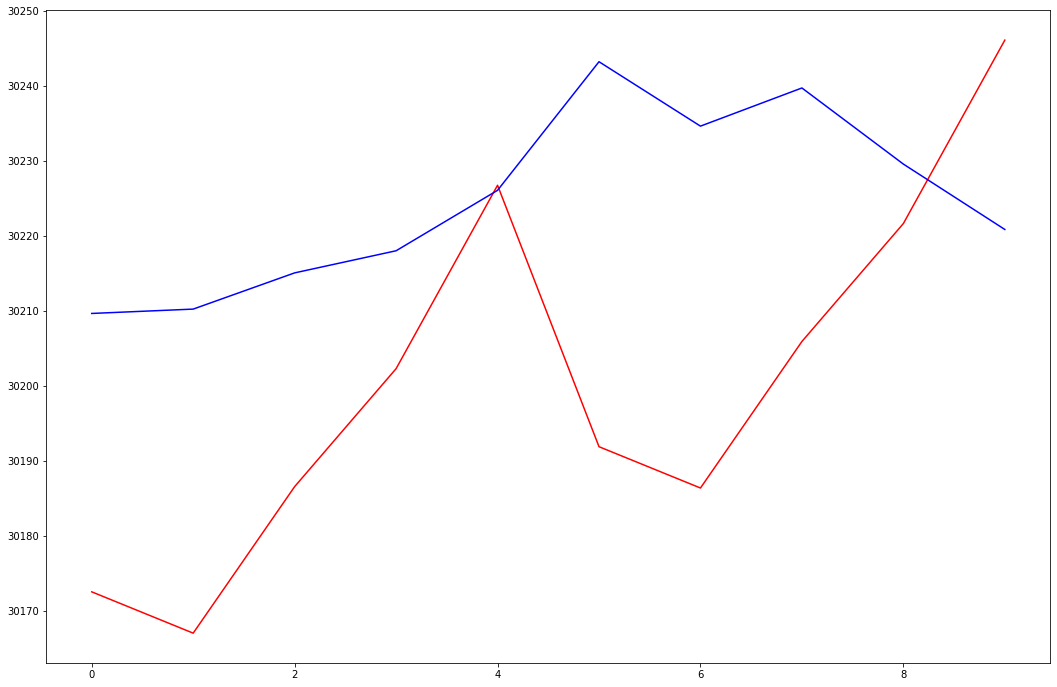

In [222]:
h = 10
print(len(train_data))
prediction, bad = base_prediction(train_data['open'][-400:], h, L=3, eps=100)

# print(prediction[-h:])
plt.plot(list(train_data['open'][-100:]), 'g', label='prediction')
print(prediction[-h:])
print(bad[-h:])
plt.figure(figsize=(18, 12))
plt.plot(prediction[-h:], 'r', label='open')
plt.plot(list(test_data['open'][:h]), 'b', label='prediction')
# plt.scatter(list(range(0, h)), list(prediction[-h:]), s=50, c='r', label='prediction')
# # plt.plot(test_data, 'b', label='prediction')
plt.show()

In [233]:
def base_prediction_old(data, h: int, L: int = 3, kmax: int = 10, eps: float = 100):
    t = len(data)
    prediction = data
    prediction = np.resize(prediction, t + h)
    # print(prediction)
    for i in range(t):
        prediction[i] = data[i]
    possible_values = [[] for i in range(h)]
    bad = np.array([0 for i in range(t + h)])
    # print(prediction[-h:])
    for i in range(h):
        print(i)
        for pattern, all_motifs  in GenerateAllMotifs(kmax, L, t + i - 1):
            val_for_pattern = get_val_for_pattern_and_pos(prediction, pattern, t + i, bad)
          
            centers = get_centers([get_val_for_motifs(prediction, motif, bad) for motif in all_motifs])

            for c in centers:
              dist = np.linalg.norm(c[:-1] - val_for_pattern)
              print(dist)
              if dist < eps:
                  possible_values[i].append(c[-1])
        
        # sorted(possible_values)
        # print("aa")
        # print(len(possible_values[i]))
        if len(possible_values[i]):
            print(possible_values[i])
            prediction[t + i] = mean(possible_values[i])
        # print(prediction[t + i])
    return prediction


3225
0
29.871850977968435
339.5741197114057
11.796782959052193
358.2174136106263
23.24641448960761
349.66255527579784
16.300231990027747
370.7310312683734
12.987267247200547
13.593903504883881
350.6541052680355
15.547344492574672
326.71109749678385
18.774500788999408
364.17139915307587
21.06442837599643
330.55997901211657
36.18422575872791
334.2364399829848
54.44329896948303
396.95387405213677
30.222495892305865
112.11068860728903
29.91482755475842
352.29371984184087
14.795653637717649
371.08331014445935
21.990417716683602
364.6920276237779
18.962727195809045
342.97590942413234
17.586721476414155
345.0548195429164
16.91949997127472
340.70030147476825
31.201006781716814
341.5102815942245
46.17954233996191
403.24571479434036
46.65338404784457
355.25581253357325
43.95221035034401
335.58613870938586
21.719413743268507
350.3079949685528
2.393351390418937
349.4967437492847
24.084325586534327
361.0132078340218
28.229869404758897
353.0868410690318
13.486232808565774
317.8393101993528
30.607369

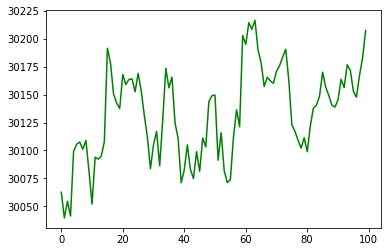

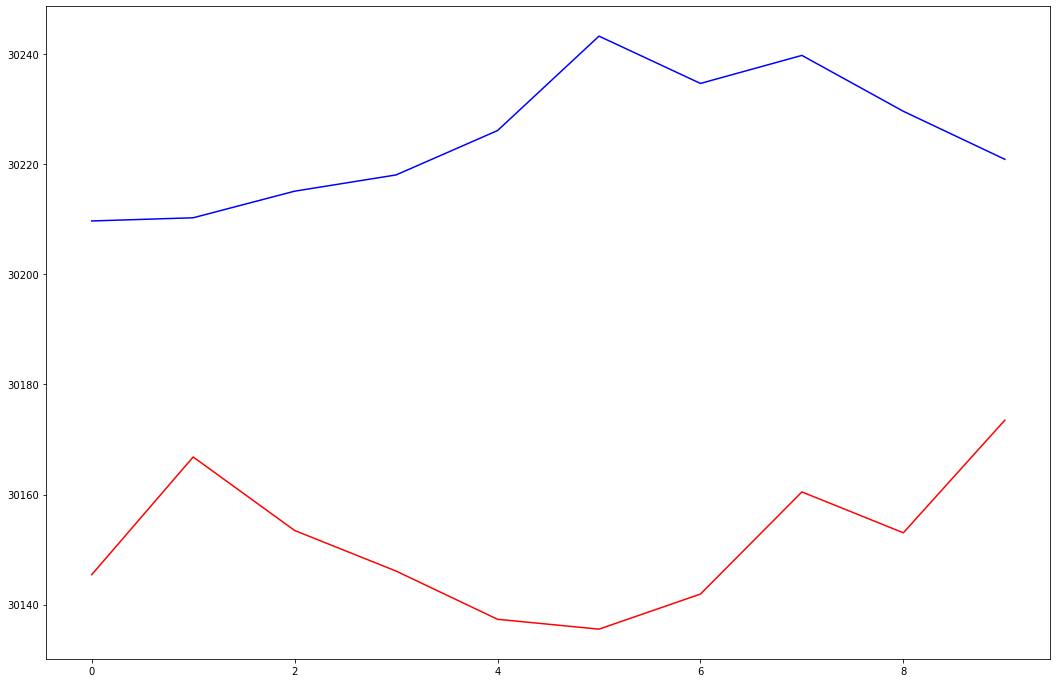

In [284]:
h = 10
print(len(train_data))
prediction = base_prediction_old(train_data['open'][-200:], h, L=3, eps=100)

# print(prediction[-h:])
plt.plot(list(train_data['open'][-100:]), 'g', label='prediction')
print(prediction[-h:])
plt.figure(figsize=(18, 12))
plt.plot(prediction[-h:], 'r', label='open')
plt.plot(list(test_data['open'][:h]), 'b', label='prediction')
# plt.scatter(list(range(0, h)), list(prediction[-h:]), s=50, c='r', label='prediction')
# # plt.plot(test_data, 'b', label='prediction')
plt.show()